# Assignment
1. Klik pada file lalu pilih `save a copy in drive` untuk file Format Task Assignment.ipynb ini
2. Download dataset : https://drive.google.com/drive/folders/1FyigllyrhI-sAsjbPaLfwV7REwLqe_xt?usp=sharing
3. Data ini hanya terdiri dari dua kolom: Jam dan Skor. Regresi linear sangat efektif digunakan untuk memprediksi skor siswa berdasarkan jumlah jam belajar.
4. Lakukan hal berikut :
- Import dataset
- Exploratory Data Analysis : statistical summary untuk mengetahui rata-rata, median, mean dkk, lalu lakukan scatter plot.
- lakukan analisis lainnya semisal correlation heatmap (opsional)
- feature engineering (check duplikat data dan drop duplikat, check missing value, check outlier
- splitting data ke X_train,X_test,y_train,y_test
- lakukan regresi modelling memakai linear regression, decision tree atau random forest (gunakan minimal 2 model)
- pada model linear regression keluarkan nilai intercept dan coef, namun pada decision tree dan random forest tidak bisa mengeluarkan nilai intercept dan coef karena libraries nya tidak support.
- Plotting the actual and predicted values pada tiap model
- Keluarkan nilai R-Score untuk membandingkan 2 model yang anda gunakan dan berikan kesimpulan model terbaik dengan melihat R-Score tertinggi.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# import all the libraries
import pandas as pd # mengolah data frame (kolom dan baris)
import matplotlib.pyplot as plt # plotting
import seaborn as sns           # plotting
import numpy as np # array, matrix

### **Import dataset**

In [9]:
# read the dataset using pandas
data = pd.read_csv('/content/drive/MyDrive/AI Machine Learning Data Series Day 2/Assignment/student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


###**Exploratory Data Analysis**


In [10]:
 data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 900x500 with 0 Axes>

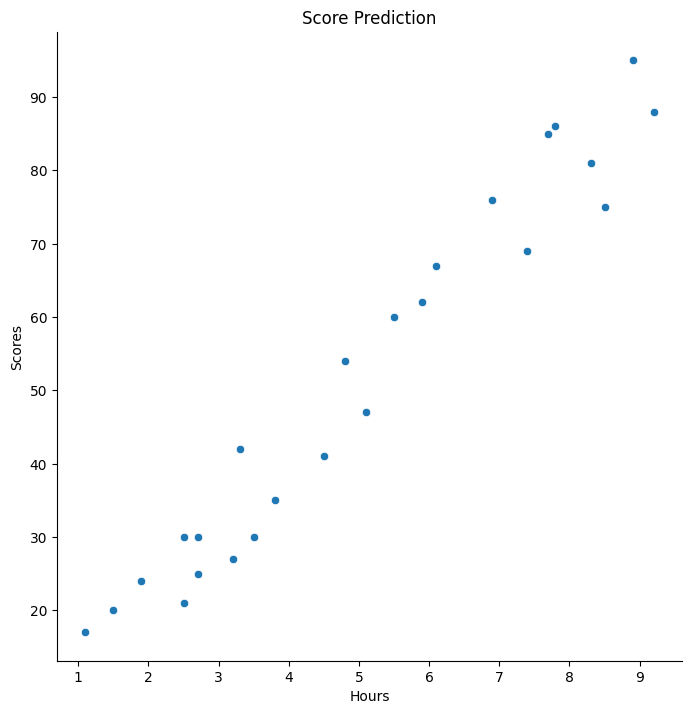

In [11]:
plt.figure(figsize=(9,5))
sns.pairplot(data,x_vars=['Hours'],y_vars=['Scores'],size=7,kind='scatter')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Score Prediction')
plt.show()

###**Feature Engineering**


In [12]:
df = data.copy()

# Check duplicated data
print(df.shape)
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before

# Drop duplicates
df = df.drop_duplicates()
print(df.shape)

(25, 2)
(25, 2)


#####There is no missing values

In [13]:
# Check missing value
df.isna().sum()

Hours     0
Scores    0
dtype: int64

####Check outlier

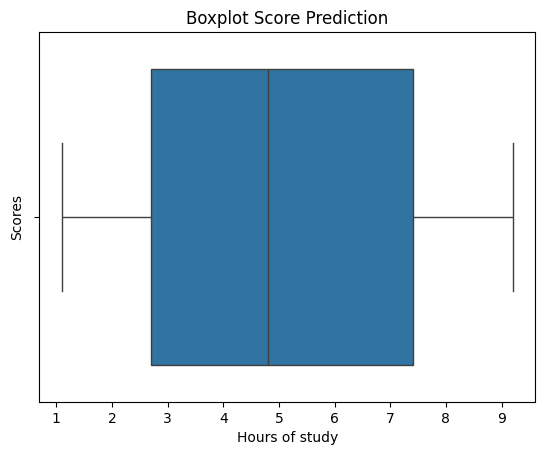

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier Analysis
sns.boxplot(x="Hours", data=df)

# Menambahkan label sumbu dan judul
plt.xlabel("Hours of study")
plt.ylabel("Scores")
plt.title("Boxplot Score Prediction")

# Menampilkan plot
plt.show()

### **Splitting the data**

In [15]:
# Hours data
X = data['Hours']
# X = data[data['kolom_1','kolom_2',...,'kolom_n']]
X.head()

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

In [16]:
# Scores data
y = data['Scores']
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [17]:
# Import machine learning datafrom scikit learn
from sklearn.model_selection import train_test_split

In [18]:
# Split the data for train and test
# 75:25 or 70:30 or 80:20 or 85:15, train size > test size
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=42)

###**Linear Regression**

In [19]:
!pip install scikit-learn

In [20]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [21]:
# Note: jika ada lebih dari 2 kolom atau X lebih dari 1 [y sudah pasti 1 kolom], gunakan hanya SPLIT DATA FORMAT, format di bawah tidak diperlukan
# Create new axis for x column in array
X_train = np.array(X_train)[:, np.newaxis]
X_test = np.array(X_test)[:, np.newaxis]

In [22]:
# Array
X_train

array([[5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [23]:
#array
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [24]:
y_train

1     47
22    35
5     20
2     27
12    41
15    95
3     75
4     30
20    30
17    24
21    54
18    67
24    86
7     60
10    85
14    17
19    69
6     88
Name: Scores, dtype: int64

In [25]:
# Fitting the model using Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [26]:
# Predicting the Hours for Test Values
y_pred = lr_model.predict(X_test)
# y_pred_train = lr_model.predict(X_train)

In [27]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [28]:
y_pred

array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

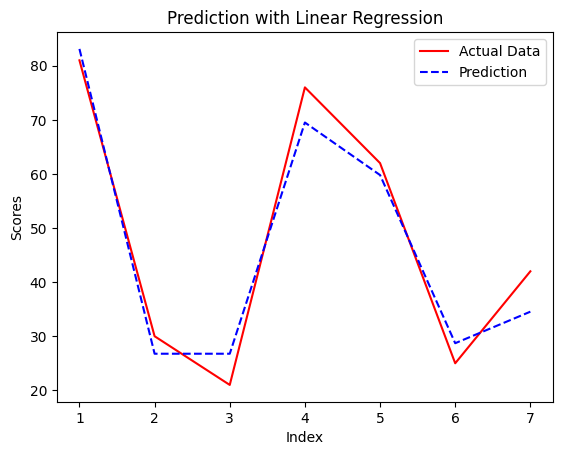

In [29]:
# Plotting the actual and predicted values
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Index')
plt.ylabel('Scores')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

In [30]:
# Import metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [31]:
# Calculate R square value
rsq = r2_score(y_test,y_pred)

In [32]:
print('r square linear regression:',rsq)

r square linear regression: 0.9553509219739938


In [33]:
# Intercept/y-intercept and coefficient/slope of the line
print('Intercept of the Linear Regression model:',lr_model.intercept_)
print('Coefficient of the line Linear Regression model:',lr_model.coef_)
# y = m x + c atau y = a x + b

Intercept of the Linear Regression model: 2.4803670915057623
Coefficient of the line Linear Regression model: [9.71409219]


![](http://)Then it is said to form a line with result in Linear Regression

###y = 9.71409219 x + 2.4803670915057623
####(hanya digunakan pada Linear Regression model)
with x is the value of study hours

**Decision Tree Regressor**
Using another Machine Learning Model :
1. Decision Tree
2. Random Forest

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [36]:
# Predicting the Scores for the Test values
y_pred_dt = dt_model.predict(X_test)

In [37]:
y_pred_dt

array([75., 30., 30., 69., 67., 30., 27.])

In [38]:
y_test

8     81
16    30
0     21
23    76
11    62
9     25
13    42
Name: Scores, dtype: int64

In [39]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

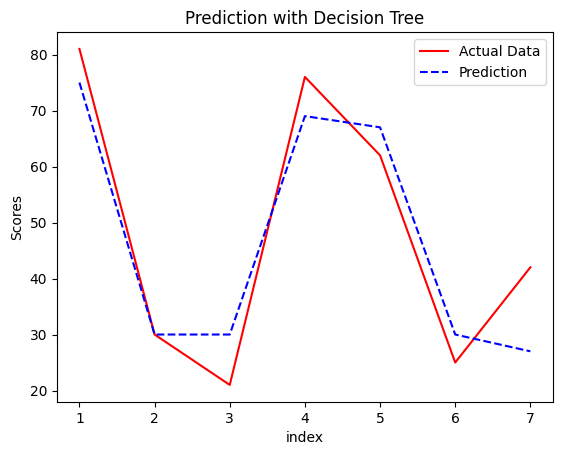

In [40]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('index')
plt.ylabel('Scores')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

In [41]:
# Calculate R square value
rsq_dt = r2_score(y_test,y_pred_dt)

In [42]:
print('r square Decision Tree Results:',rsq_dt)

r square Decision Tree Results: 0.8803859268443893


####<b>Kesimpulan : </b>
Persentase Tingkat Akurasi Model Machine Learning :
 1. Linear Regression = 95%
 2. Decision Tree = 88%

Linear Regression lebih baik digunakan karena memiliki tingkat akurasi lebih tinggi yaitu 95% dibandingkan Decision Tree yang hanya 88%.